<a href="https://colab.research.google.com/github/danzgaming21/G1401221059_Muhammad-Abdan-Rofi/blob/main/Analisis_Sentimen_WIKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =========================
# 1) Load Data
# =========================
from google.colab import files
import pandas as pd
uploaded = files.upload()  # Pilih Scrap Komentar.csv

FILEPATH = "Komentar WIKA.csv"  # ganti sesuai nama file kamu
df = pd.read_csv(FILEPATH, sep=';')

print("Kolom:", df.columns)
df.head()

Saving Komentar WIKA.csv to Komentar WIKA (1).csv
Kolom: Index(['tanggal', 'komentar', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')


,tanggal,komentar,Unnamed: 2,Unnamed: 3
0,2025-07-27T10:58:26.000Z,"Bayar utang BUMN ini, supaya sahamnya tidak su...",NaN,NaN
1,2025-07-21T11:03:14.000Z,"Kepada ptwijayakarya, Bapak/Ibu KUSNANTO menja...",NaN,NaN
2,2025-07-18T13:14:25.000Z,"Siap tuk gabung proyek nya, kontak wa 08157468...",NaN,NaN
3,2025-08-19T14:37:52.000Z,Banyak mafianya dulu ikut ngirim bambu tp susa...,NaN,NaN
4,2025-08-15T22:56:25.000Z,Kebut lagi biar cepet selesai,NaN,NaN


In [3]:
# Pastikan nama kolom sesuai
KOMENTAR_COL = "komentar"   # kolom komentar
TANGGAL_COL  = "tanggal"    # kolom tanggal


In [4]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 297
Jumlah kolom: 4


In [5]:
# Remove the 'Unnamed: 2' and 'Unnamed: 3' columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])

# Display the first few rows of the cleaned DataFrame
display(df.head())

,tanggal,komentar
0,2025-07-27T10:58:26.000Z,"Bayar utang BUMN ini, supaya sahamnya tidak su..."
1,2025-07-21T11:03:14.000Z,"Kepada ptwijayakarya, Bapak/Ibu KUSNANTO menja..."
2,2025-07-18T13:14:25.000Z,"Siap tuk gabung proyek nya, kontak wa 08157468..."
3,2025-08-19T14:37:52.000Z,Banyak mafianya dulu ikut ngirim bambu tp susa...
4,2025-08-15T22:56:25.000Z,Kebut lagi biar cepet selesai


In [6]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 297
Jumlah kolom: 2


In [8]:
%pip install unidecode emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 21.2 MB/s eta 0:00:00


In [9]:
# ==== PATCH CEPAT: pastikan komentar_clean ada ====
import re
from unidecode import unidecode
import emoji

# 1) Deteksi kolom komentar kalau variabel KOMENTAR_COL belum/beda
if 'KOMENTAR_COL' not in globals() or KOMENTAR_COL not in df.columns:
    candidates = ["komentar","comment","comments","text","content","isi_komentar","latestComments","textDisplay"]
    KOMENTAR_COL = None
    for c in df.columns:
        if str(c).lower() in candidates:
            KOMENTAR_COL = c
            break
    if KOMENTAR_COL is None:
        raise ValueError(f"Tidak menemukan kolom komentar. Kolom tersedia: {list(df.columns)}")

print("Pakai kolom komentar:", KOMENTAR_COL)

# 2) Jika belum ada komentar_clean, buat sekarang
if "komentar_clean" not in df.columns:
    def emoji_to_words(text):
        t = emoji.demojize(str(text), language='id')
        t = t.replace(":", " ").replace("_", " ")
        t = re.sub(r"\s+", " ", t).strip()
        mapping = {
            r"\bred heart\b": "love",
            r"\bthumbs up\b": "thumbs up",
            r"\bface with tears of joy\b": "laugh",
            r"\bangry face\b": "angry",
            r"\bfire\b": "fire"
        }
        for pat, rep in mapping.items():
            t = re.sub(pat, rep, t)
        return t

    slang_map = {
        "yg":"yang","gk":"nggak","ga":"nggak","gak":"nggak",
        "tdk":"tidak","tp":"tapi","dgn":"dengan","dr":"dari",
        "aja":"saja","krn":"karena","udh":"sudah","sdh":"sudah"
    }
    def normalize_slang(text):
        return " ".join([slang_map.get(w, w) for w in str(text).split()])

    def clean_text(text):
        t = unidecode(str(text))
        t = re.sub(r"http\S+|www\.\S+"," ", t)
        t = re.sub(r"@\w+"," ", t)
        t = re.sub(r"#\w+"," ", t)
        t = emoji_to_words(t)
        t = t.lower()
        t = normalize_slang(t)
        t = re.sub(r"[^a-z0-9\s]"," ", t)
        t = re.sub(r"\s+"," ", t).strip()
        return t

    df["komentar_clean"] = df[KOMENTAR_COL].astype(str).apply(clean_text)

print("Kolom tersedia sekarang:", list(df.columns))
df[["komentar", "komentar_clean"] if "komentar" in df.columns else [KOMENTAR_COL, "komentar_clean"]].head()


Pakai kolom komentar: komentar
Kolom tersedia sekarang: ['tanggal', 'komentar', 'komentar_clean']


,komentar,komentar_clean
0,"Bayar utang BUMN ini, supaya sahamnya tidak su...",bayar utang bumn ini supaya sahamnya tidak suspen
1,"Kepada ptwijayakarya, Bapak/Ibu KUSNANTO menja...",kepada ptwijayakarya bapak ibu kusnanto menjad...
2,"Siap tuk gabung proyek nya, kontak wa 08157468...",siap tuk gabung proyek nya kontak wa 081574682...
3,Banyak mafianya dulu ikut ngirim bambu tp susa...,banyak mafianya dulu ikut ngirim bambu tapi su...
4,Kebut lagi biar cepet selesai,kebut lagi biar cepet selesai


In [13]:
# =========================
# D) Prediksi IndoBERT (manual, stabil)
# =========================
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

MODEL = "w11wo/indonesian-roberta-base-sentiment-classifier"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()
print("Device:", device)

s = df["komentar_clean"].astype(str)
mask_valid = s.str.strip().ne("") & ~s.str.lower().isin(["nan","none","null"])
df_valid = df.loc[mask_valid].copy()
texts = df_valid["komentar_clean"].tolist()

BATCH = 32
labels, scores = [], []
id2label = model.config.id2label

import torch.nn.functional as F
import numpy as np


for i in range(0, len(texts), BATCH):
    enc = tokenizer(texts[i:i+BATCH], padding=True, truncation=True, max_length=256, return_tensors="pt")
    enc = {k: v.to(device) for k,v in enc.items()}
    with torch.no_grad():
        out = model(**enc)
        prob = F.softmax(out.logits, dim=-1)
        conf, idx = prob.max(dim=-1)
    labels += [id2label[j.item()] for j in idx]
    scores += conf.detach().cpu().numpy().tolist()

# tempel ke df asli (baris tak-valid tetap ada, hanya NaN di kolom prediksi)
df["sentimen"] = np.nan
df["score"] = np.nan
df.loc[df_valid.index, "sentimen"] = labels
df.loc[df_valid.index, "score"] = scores

print(df["sentimen"].value_counts(dropna=False))

Device: cpu
sentimen
neutral     128
positive     82
negative     52
NaN          35
Name: count, dtype: int64


/tmp/ipython-input-3173377515.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positi

In [24]:
# =========================
# E) Ringkas & Simpan
# =========================
ringkas = df["sentimen"].value_counts().rename_axis("sentimen").reset_index(name="jumlah")
ringkas["persen"] = (100*ringkas["jumlah"]/ringkas["jumlah"].sum()).round(2)
print(ringkas)

out_cols = [c for c in [TANGGAL_COL, KOMENTAR_COL, "komentar_clean", "sentimen", "score"] if c]
df[out_cols].to_csv("hasil_sentimen_indobert.csv", index=False, encoding="utf-8-sig")
print("✅ Disimpan ke: hasil_sentimen_indobert.csv")


   sentimen  jumlah  persen
0   neutral     128   48.85
1  positive      82   31.30
2  negative      52   19.85
✅ Disimpan ke: hasil_sentimen_indobert.csv


In [ ]:
# 1) Load Data
# ===================================
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("hasil_sentimen_indobert.csv")

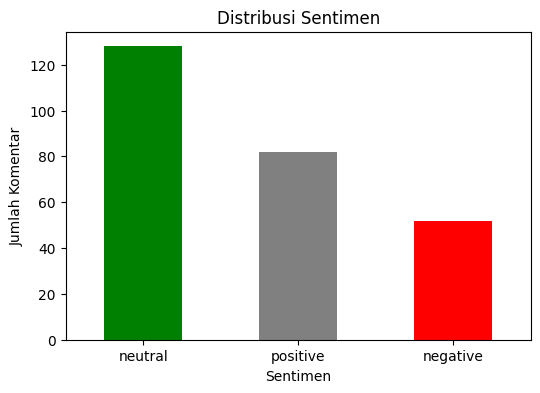

In [63]:
# 2) Bar Chart Distribusi Sentimen
# ===================================
sent_count = df["sentimen"].value_counts()
plt.figure(figsize=(6,4))
sent_count.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=0)
plt.show()

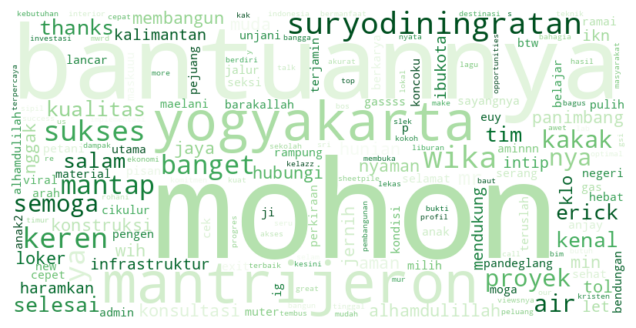

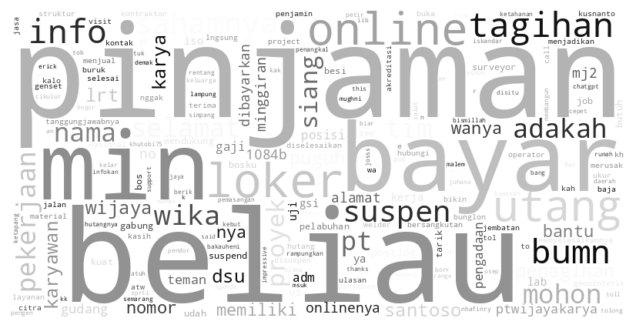

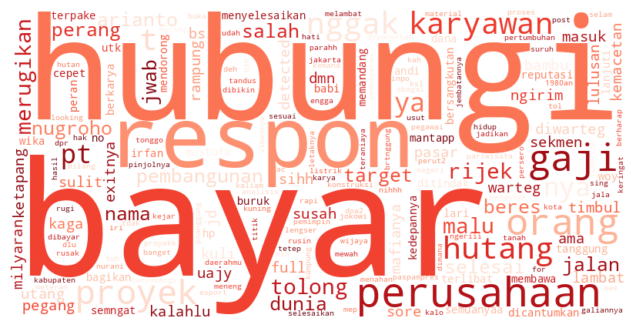

In [64]:
# 3) Wordcloud per Sentimen
# ===================================
stop_words = set(stopwords.words('indonesian'))

def buat_wordcloud(data, warna):
    text = " ".join([str(k) for k in data if isinstance(k, str)])
    wc = WordCloud(width=800, height=400,
                   background_color="white",
                   colormap=warna,
                   stopwords=stop_words,
                   collocations=False).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Wordcloud Positif
buat_wordcloud(df[df['sentimen']=='positive']["komentar_clean"], "Greens")

# Wordcloud Netral
buat_wordcloud(df[df['sentimen']=='neutral']["komentar_clean"], "gray")

# Wordcloud Negatif
buat_wordcloud(df[df['sentimen']=='negative']["komentar_clean"], "Reds")

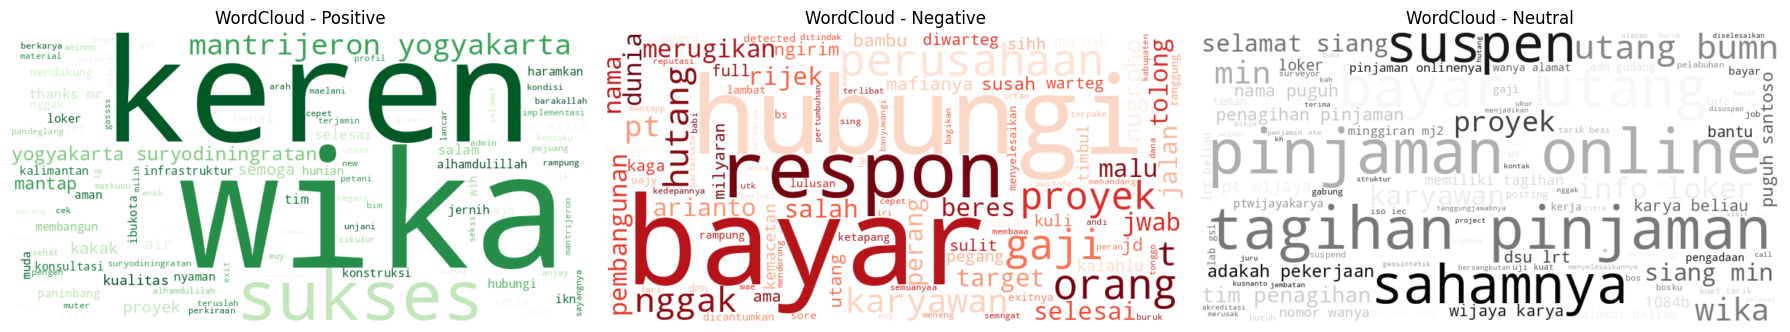

In [73]:
# ========================================
# 2. Stopwords Bahasa Indonesia + Custom
# ========================================
# Stopwords dari NLTK bahasa Indonesia
indo_stopwords = set(stopwords.words('indonesian'))

# Stopwords tambahan khusus dataset kamu
custom_stopwords = {
    # kata pengisi/partikel
    "nih","loh","dong","aja","deh","pun","nya","nyaa","banget","bgt","btw","kl","klo","kalo","udah","sudah",
    "iya","ya","yg","yang","di","ke","dari","atau","dan","untuk","pada","serta","ini","itu","mohon","bantuannya"
}
# Gabungkan semua stopwords
from wordcloud import STOPWORDS
all_stopwords = STOPWORDS.union(indo_stopwords).union(custom_stopwords)

# ========================================
# 3. Fungsi Plot WordCloud
# ========================================
def plot_wordcloud(text_series, title, color):
    text = " ".join(text_series)
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=all_stopwords,
        colormap=color,
        max_words=100
    ).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

# ========================================
# 4. Plot WordCloud per Sentimen
# ========================================
sentiments = [
    ('positive', 'Greens'),
    ('negative', 'Reds'),
    ('neutral', 'Greys')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (senti, color) in zip(axes, sentiments):
    texts = df[df['sentimen'] == senti]['komentar_clean']
    plt.sca(ax)
    plot_wordcloud(texts, f"WordCloud - {senti.capitalize()}", color)

plt.tight_layout()
plt.show()

In [74]:
# ==== LDA untuk komentar POSITIF hasil IndoBERT ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [75]:
# 0) Pilih subset: ganti 'positive' -> 'negative'/'neutral' sesuai kebutuhan
TEXT_COL = "komentar_clean"   # atau "komentar_lda" kalau pakai normalisasi doa
LABEL    = "positive"

texts_all = (df.loc[df["sentimen"]==LABEL, TEXT_COL]
               .dropna().astype(str).tolist())
print(f"{LABEL}: {len(texts_all)} dokumen")

train_txt, valid_txt = train_test_split(texts_all, test_size=0.2, random_state=42, shuffle=True)

# 1) fungsi UMass coherence (tanpa gensim)
def umass_coherence(lda, X, vocab, topn=15, eps=1e-12):
    """
    X: dokumen-term matrix biner (csr_matrix)
    vocab: np.array feature names
    """
    # binarisasi (kemunculan kata di dokumen)
    Xb = X.copy()
    Xb.data[:] = 1

    # frekuensi dokumen per term
    dfreq = np.asarray(Xb.sum(axis=0)).ravel()  # shape [V]
    # precompute co-occurrence (dokumen yang mengandung i & j)
    # gunakan perkalian matriks: Xb.T @ Xb  -> [V x V]
    C = (Xb.T @ Xb).astype(np.float64)  # sangat efisien untuk sparse

    topics = lda.components_
    V = vocab
    K = lda.n_components

    coh_scores = []
    for k in range(K):
        top_idx = topics[k].argsort()[-topn:]  # top terms
        score_k = 0.0; pairs = 0
        # UMass: sum_{i>j} log( (D(w_i, w_j) + eps) / D(w_j) )
        for i_pos in range(1, len(top_idx)):
            wi = top_idx[i_pos]
            for j_pos in range(0, i_pos):
                wj = top_idx[j_pos]
                Dij = C[wi, wj]
                Dj  = dfreq[wj]
                score_k += np.log((Dij + eps) / (Dj + eps))
                pairs += 1
        coh_scores.append(score_k / max(1, pairs))
    # rata-rata coherence seluruh topik
    return float(np.mean(coh_scores))

# 2) grid search
K_LIST      = [3,4,5,6]
MIN_DF_LIST = [3]
MAX_DF_LIST = [0.75]
NGRAMS_LIST = [(1,1),(1,2)]

best = None; tried = 0
history = []

for k in K_LIST:
    for mindf in MIN_DF_LIST:
        for maxdf in MAX_DF_LIST:
            for ngr in NGRAMS_LIST:
                vec = CountVectorizer(
                    min_df=mindf, max_df=maxdf, ngram_range=ngr,
                    stop_words=list(all_stopwords),
                    token_pattern=r"(?u)\b[a-zA-Z]{3,}\b",
                    lowercase=True
                )
                Xtr = vec.fit_transform(train_txt)
                if Xtr.shape[1] == 0:
                    continue
                Xva = vec.transform(valid_txt)

                lda = LatentDirichletAllocation(
                    n_components=k, learning_method="batch",
                    max_iter=60, random_state=42
                ).fit(Xtr)

                # metrik
                perp = lda.perplexity(Xva)  # kecil lebih baik
                # coherence dihitung di TRAIN (umum untuk coherence)
                coh  = umass_coherence(lda, Xtr, vec.get_feature_names_out(), topn=15)

                tried += 1
                history.append({"k":k,"min_df":mindf,"max_df":maxdf,"ngram":ngr,
                                "perplexity":perp, "coherence_umass":coh})

                cand = (perp, -coh, lda, vec, {"k":k,"min_df":mindf,"max_df":maxdf,"ngram":ngr})
                if (best is None) or (cand[0] < best[0]) or (cand[0]==best[0] and cand[1] < best[1]):
                    best = cand

# 3) hasil terbaik + ringkasan
perp, neg_coh, lda_best, vec_best, params = best
terms = np.array(vec_best.get_feature_names_out())
print(f"\n[{LABEL.upper()}] Best params (dicoba {tried} kombinasi): {params} | "
      f"perplexity_valid={perp:.2f} | coherence_umass={-neg_coh:.3f}")

# tampilkan topik
def print_topics(lda, terms, topn=12):
    for t, comp in enumerate(lda.components_):
        top = terms[np.argsort(comp)][-topn:]
        print(f"Topik {t+1}: {', '.join(top)}")

print("\nTopik & kata kunci:")
print_topics(lda_best, terms, topn=12)

positive: 82 dokumen


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'baiknya', 'berkali', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'kali', 'kurangnya', 'let', 'mata', 'mustn', 'olah', 'sekurang', 'setidak', 'shan', 'shouldn', 'tama', 'tidaknya', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(



[POSITIVE] Best params (dicoba 8 kombinasi): {'k': 3, 'min_df': 3, 'max_df': 0.75, 'ngram': (1, 1)} | perplexity_valid=169.20 | coherence_umass=-22.913

Topik & kata kunci:
Topik 1: proyek, semoga, wika, keren, mantap, suryodiningratan, kualitas, sukses, salam, kenal, mantrijeron, yogyakarta
Topik 2: kenal, yogyakarta, mantrijeron, suryodiningratan, mantap, semoga, salam, sukses, kualitas, tim, proyek, wika
Topik 3: wika, salam, yogyakarta, mantrijeron, kualitas, kenal, proyek, semoga, keren, sukses, mantap, suryodiningratan


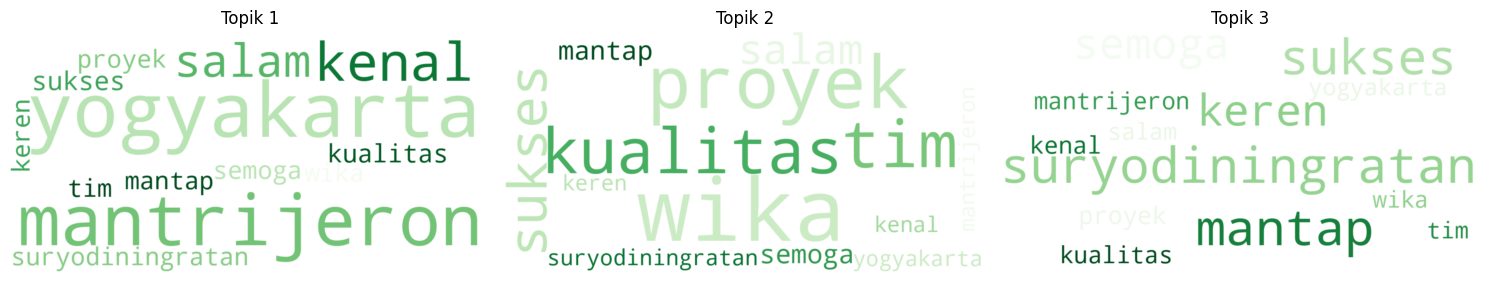

✅ WordCloud disimpan ke folder: lda_positive/


In [76]:
# ================================
# WordCloud per topik + Simpan CSV
# ================================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) WordCloud per topik ------------------------------------
label2cmap = {"positive":"Greens","negative":"Reds", "neutral":"Greys"}
cmap = label2cmap.get(LABEL, "Blues")

k = params["k"]
fig, axes = plt.subplots(1, k, figsize=(5*k, 4))
if k == 1: axes = [axes]

# buat folder output
os.makedirs(f"lda_{LABEL}", exist_ok=True)

for i, ax in enumerate(axes):
    comp = lda_best.components_[i]
    # ambil 60 kata teratas untuk wordcloud
    top_idx = comp.argsort()[-60:]
    freq = {terms[j]: float(comp[j]) for j in top_idx}
    wc = WordCloud(width=1200, height=600, background_color="white", colormap=cmap)
    wc = wc.generate_from_frequencies(freq)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topik {i+1}")
    # simpan juga ke file png
    wc.to_file(f"lda_{LABEL}/wordcloud_topic_{i+1}.png")

plt.tight_layout()
plt.show()
print(f"✅ WordCloud disimpan ke folder: lda_{LABEL}/")

In [79]:

# 0) Pilih subset: ganti 'positive' -> 'negative'/'neutral' sesuai kebutuhan
TEXT_COL = "komentar_clean"   # atau "komentar_lda" kalau pakai normalisasi doa
LABEL    = "negative"

texts_all = (df.loc[df["sentimen"]==LABEL, TEXT_COL]
               .dropna().astype(str).tolist())
print(f"{LABEL}: {len(texts_all)} dokumen")

train_txt, valid_txt = train_test_split(texts_all, test_size=0.2, random_state=42, shuffle=True)

# 1) fungsi UMass coherence (tanpa gensim)
def umass_coherence(lda, X, vocab, topn=15, eps=1e-12):
    """
    X: dokumen-term matrix biner (csr_matrix)
    vocab: np.array feature names
    """
    # binarisasi (kemunculan kata di dokumen)
    Xb = X.copy()
    Xb.data[:] = 1

    # frekuensi dokumen per term
    dfreq = np.asarray(Xb.sum(axis=0)).ravel()  # shape [V]
    # precompute co-occurrence (dokumen yang mengandung i & j)
    # gunakan perkalian matriks: Xb.T @ Xb  -> [V x V]
    C = (Xb.T @ Xb).astype(np.float64)  # sangat efisien untuk sparse

    topics = lda.components_
    V = vocab
    K = lda.n_components

    coh_scores = []
    for k in range(K):
        top_idx = topics[k].argsort()[-topn:]  # top terms
        score_k = 0.0; pairs = 0
        # UMass: sum_{i>j} log( (D(w_i, w_j) + eps) / D(w_j) )
        for i_pos in range(1, len(top_idx)):
            wi = top_idx[i_pos]
            for j_pos in range(0, i_pos):
                wj = top_idx[j_pos]
                Dij = C[wi, wj]
                Dj  = dfreq[wj]
                score_k += np.log((Dij + eps) / (Dj + eps))
                pairs += 1
        coh_scores.append(score_k / max(1, pairs))
    # rata-rata coherence seluruh topik
    return float(np.mean(coh_scores))

# 2) grid search
K_LIST      = [3,4,5,6]
MIN_DF_LIST = [2,3]
MAX_DF_LIST = [0.75]
NGRAMS_LIST = [(1,1),(1,2)]

best = None; tried = 0
history = []

for k in K_LIST:
    for mindf in MIN_DF_LIST:
        for maxdf in MAX_DF_LIST:
            for ngr in NGRAMS_LIST:
                vec = CountVectorizer(
                    min_df=mindf, max_df=maxdf, ngram_range=ngr,
                    stop_words=list(all_stopwords),
                    token_pattern=r"(?u)\b[a-zA-Z]{3,}\b",
                    lowercase=True
                )
                Xtr = vec.fit_transform(train_txt)
                if Xtr.shape[1] == 0:
                    continue
                Xva = vec.transform(valid_txt)

                lda = LatentDirichletAllocation(
                    n_components=k, learning_method="batch",
                    max_iter=60, random_state=42
                ).fit(Xtr)

                # metrik
                perp = lda.perplexity(Xva)  # kecil lebih baik
                # coherence dihitung di TRAIN (umum untuk coherence)
                coh  = umass_coherence(lda, Xtr, vec.get_feature_names_out(), topn=15)

                tried += 1
                history.append({"k":k,"min_df":mindf,"max_df":maxdf,"ngram":ngr,
                                "perplexity":perp, "coherence_umass":coh})

                cand = (perp, -coh, lda, vec, {"k":k,"min_df":mindf,"max_df":maxdf,"ngram":ngr})
                if (best is None) or (cand[0] < best[0]) or (cand[0]==best[0] and cand[1] < best[1]):
                    best = cand

# 3) hasil terbaik + ringkasan
perp, neg_coh, lda_best, vec_best, params = best
terms = np.array(vec_best.get_feature_names_out())
print(f"\n[{LABEL.upper()}] Best params (dicoba {tried} kombinasi): {params} | "
      f"perplexity_valid={perp:.2f} | coherence_umass={-neg_coh:.3f}")

# tampilkan topik
def print_topics(lda, terms, topn=12):
    for t, comp in enumerate(lda.components_):
        top = terms[np.argsort(comp)][-topn:]
        print(f"Topik {t+1}: {', '.join(top)}")

print("\nTopik & kata kunci:")
print_topics(lda_best, terms, topn=12)

negative: 52 dokumen


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'baiknya', 'berkali', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'kali', 'kurangnya', 'let', 'mata', 'mustn', 'olah', 'sekurang', 'setidak', 'shan', 'shouldn', 'tama', 'tidaknya', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(



[NEGATIVE] Best params (dicoba 16 kombinasi): {'k': 3, 'min_df': 3, 'max_df': 0.75, 'ngram': (1, 1)} | perplexity_valid=24.28 | coherence_umass=-21.108

Topik & kata kunci:
Topik 1: hubungi, respon, proyek, bayar, nggak, orang, perusahaan
Topik 2: hubungi, respon, perusahaan, nggak, orang, bayar, proyek
Topik 3: orang, proyek, perusahaan, bayar, nggak, hubungi, respon


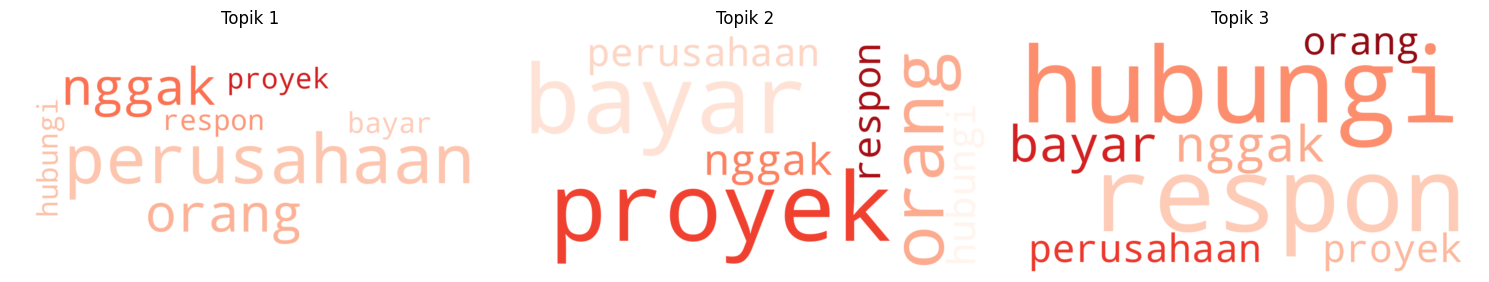

✅ WordCloud disimpan ke folder: lda_negative/


In [80]:
# ================================
# WordCloud per topik + Simpan CSV
# ================================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) WordCloud per topik ------------------------------------
label2cmap = {"positive":"Greens","negative":"Reds", "neutral":"Greys"}
cmap = label2cmap.get(LABEL, "Blues")

k = params["k"]
fig, axes = plt.subplots(1, k, figsize=(5*k, 4))
if k == 1: axes = [axes]

# buat folder output
os.makedirs(f"lda_{LABEL}", exist_ok=True)

for i, ax in enumerate(axes):
    comp = lda_best.components_[i]
    # ambil 60 kata teratas untuk wordcloud
    top_idx = comp.argsort()[-60:]
    freq = {terms[j]: float(comp[j]) for j in top_idx}
    wc = WordCloud(width=1200, height=600, background_color="white", colormap=cmap)
    wc = wc.generate_from_frequencies(freq)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topik {i+1}")
    # simpan juga ke file png
    wc.to_file(f"lda_{LABEL}/wordcloud_topic_{i+1}.png")

plt.tight_layout()
plt.show()
print(f"✅ WordCloud disimpan ke folder: lda_{LABEL}/")